<a href="https://colab.research.google.com/github/PosgradoMNA/actividades-de-aprendizaje-dsercam/blob/main/ActividadSemana5A01182676.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#**<font color="darkblue">Actividad Semanal - Repaso Semana 5 </font>**
##**<font color="darkorange"> Transformación y reducción de dimensiones</font>**

###**Maestría en Inteligencia Artificial Aplicada**
###**Curso: Ciencia y analítica de datos**
####**Tecnológico de Monterrey**
#####**Prof: María de la Paz Rico Fernández**

###**<font color="darkgray">Nombre del estudiante: Dante Rodrigo Serna Camarillo</font>**
###**<font color="darkgray">Matrícula: A01182676</font>**

# Bienvenido al notebook
#Repaso de Reducción de dimensiones
El objetivo es que entendamos de una manera visual, que es lo que pasa cuando nosotros seleccionamos cierto número de componentes principales o % de variabilidad  de una base de datos.

Primero entenderemos, que pasa adentro de PCA que se basa en lo siguiente a grandes razgos:

**Análisis de Componentes Principales**

El análisis de datos multivariados involucra determinar transformaciones lineales que ayuden
a entender las relaciones entre las características importantes de los datos. La idea central del Análisis de Componentes Principales (PCA) es reducir las dimensiones de un conjunto de datos que presenta variaciones correlacionadas, reteniendo una buena proporción de la variación presente en dicho conjunto. Esto se logra obteniendo la transformación a un nuevo conjunto de variables: los componentes principales (PC). Cada PC es una combinación lineal con máxima varianza en dirección ortogonal a los demás PC.


![title](https://miro.medium.com/max/720/1*XGaA7KWUlhWZLIezYEBIHA.gif)


Para entender un poco más de PCA y SVD, visita el siguiente link:
*Truco: Prueba entrar con tu cuenta del tec :)*

https://towardsdatascience.com/pca-and-svd-explained-with-numpy-5d13b0d2a4d8


Basicamente, vamos a seguir los siguientes pasos:

1. Obtener la covarianza. OJO: X tiene sus datos centrados :)

![title](https://miro.medium.com/max/194/1*92t9OuqxIG0YpJXsNNgI4A.png)

2. Los componentes principales se van a obtener de la eigen descomposicion de la matriz de covarianza.

![title](https://miro.medium.com/max/260/1*c1S0_26A8RxEQQUVyMp5Vw.png)

3. Para la reducción de dimensiones vamos a seleccionar k vectores de W y proyectaremos nuestros datos.

![title](https://miro.medium.com/max/214/1*jnj2YMpWIApnCzxRU_zjfg.png)

![title](https://miro.medium.com/max/720/1*ba0XpZtJrgh7UpzWcIgZ1Q.jpeg)






# Ejercicio 1, Descomposición y composición
***Descomposición***

Encuentra los eigenvalores y eigenvectores de las siguientes matrices

$A = \begin{pmatrix} 3,0,2 \\ 3,0,-2 \\ 0,1,1 \end{pmatrix}$
$A2 = \begin{pmatrix} 1,3,8 \\ 2,0,0 \\ 0,0,1 \end{pmatrix}$
$A3 = \begin{pmatrix} 5,4,0 \\ 1,0,1 \\ 10,7,1 \end{pmatrix}$

y reconstruye la matriz original a traves de las matrices 
$WDW^{-1}$ (OJO. Esto es lo mismo de la ecuación del paso 2 solo le cambiamos la variable a la matriz diagonal)




# Eigenvalores y eigenvectores

In [2]:
###-----------------EJEMPLO DE EIGENVALORES
import numpy as np
from numpy import array
from numpy.linalg import eig
# define la matriz
A = array([[1, 2, 3], [4, 5, 6], [7, 8, 9]])
print("-------Matriz original-------")
print(A)
print("-----------------------------")
# calcula la eigendescomposición
values, vectors = eig(A)
print(values) #D
print(vectors) #W

#Ejemplo de reconstrucción


values, vectors = np.linalg.eig(A)

W = vectors
Winv = np.linalg.inv(W)
D = np.diag(values)
#la matriz B tiene que dar igual a A
#reconstruye la matriz 
print("-------Matriz reconstruida-------")
# Realiza la reconstruccion de B=W*D*Winv, te da lo mismo de A?
#ojo, estas multiplicando matrices, no escalares ;)
#TU CODIGO AQUI-------------------------------------
B= np.matmul(np.matmul(W,D),Winv)
print(B)
print("-----------------------------")

-------Matriz original-------
[[1 2 3]
 [4 5 6]
 [7 8 9]]
-----------------------------
[ 1.61168440e+01 -1.11684397e+00 -1.30367773e-15]
[[-0.23197069 -0.78583024  0.40824829]
 [-0.52532209 -0.08675134 -0.81649658]
 [-0.8186735   0.61232756  0.40824829]]
-------Matriz reconstruida-------
[[1. 2. 3.]
 [4. 5. 6.]
 [7. 8. 9.]]
-----------------------------


In [15]:
#Matriz 1

#definir la matriz original
A = array([[3.0, 0.0, 2.0], [3.0,0.0, -2.0], [0.0, 1.0, 1.0]])
print("-------Matriz original-------")
print(A)
print("-----------------------------\n")

# calcula la eigendescomposición
values, W = eig(A)
print("-------Eigenvalores-------")
print(values) #D
print("-----------------------------\n")

print("-------Eigenvector-------")
print(vectors) #W
print("-----------------------------\n")

Winv = np.linalg.inv(W)
print("-------Eigenvalores a matriz diagonal-------")
D = np.diag(values)
print(D)
print("-----------------------------\n")

print("-------Matriz reconstruida-------")
A1_composed= np.matmul(np.matmul(W,D),Winv)
print(A1_composed.round(decimals=0))
print("-----------------------------")

-------Matriz original-------
[[ 3.  0.  2.]
 [ 3.  0. -2.]
 [ 0.  1.  1.]]
-----------------------------

-------Eigenvalores-------
[3.54451153+0.j         0.22774424+1.82582815j 0.22774424-1.82582815j]
-----------------------------

-------Eigenvector-------
[[-0.80217543+0.j         -0.04746658+0.2575443j  -0.04746658-0.2575443j ]
 [-0.55571339+0.j          0.86167879+0.j          0.86167879-0.j        ]
 [-0.21839689+0.j         -0.16932106-0.40032224j -0.16932106+0.40032224j]]
-----------------------------

-------Eigenvalores a matriz diagonal-------
[[3.54451153+0.j         0.        +0.j         0.        +0.j        ]
 [0.        +0.j         0.22774424+1.82582815j 0.        +0.j        ]
 [0.        +0.j         0.        +0.j         0.22774424-1.82582815j]]
-----------------------------

-------Matriz reconstruida-------
[[ 3.+0.j  0.-0.j  2.-0.j]
 [ 3.-0.j  0.+0.j -2.+0.j]
 [ 0.+0.j  1.-0.j  1.+0.j]]
-----------------------------


In [22]:
#Matriz 2
#definir la matriz original
A = array([[1.0, 3.0, 8.0], [2.0,0.0, 0.0], [0.0, 0.0, 1.0]])
print("-------Matriz original-------")
print(A)
print("-----------------------------\n")

# calcula la eigendescomposición
values, W = eig(A)
print("-------Eigenvalores-------")
print(values) #D
print("-----------------------------\n")

print("-------Eigenvector-------")
print(vectors) #W
print("-----------------------------\n")

Winv = np.linalg.inv(W)
print("-------Eigenvalores a matriz diagonal-------")
D = np.diag(values)
print(D)
print("-----------------------------\n")

print("-------Matriz reconstruida-------")
A1_composed= np.matmul(np.matmul(W,D),Winv)
print(A1_composed.round())
print("-----------------------------")

-------Matriz original-------
[[1. 3. 8.]
 [2. 0. 0.]
 [0. 0. 1.]]
-----------------------------

-------Eigenvalores-------
[ 3. -2.  1.]
-----------------------------

-------Eigenvector-------
[[-0.80217543+0.j         -0.04746658+0.2575443j  -0.04746658-0.2575443j ]
 [-0.55571339+0.j          0.86167879+0.j          0.86167879-0.j        ]
 [-0.21839689+0.j         -0.16932106-0.40032224j -0.16932106+0.40032224j]]
-----------------------------

-------Eigenvalores a matriz diagonal-------
[[ 3.  0.  0.]
 [ 0. -2.  0.]
 [ 0.  0.  1.]]
-----------------------------

-------Matriz reconstruida-------
[[1. 3. 8.]
 [2. 0. 0.]
 [0. 0. 1.]]
-----------------------------


In [30]:
#Matriz 3
#definir la matriz original
A = array([[5.0, 4.0, 0.0], [1.0,0.0, 1.0], [10.0, 7.0, 1.0]])
print("-------Matriz original-------")
print(A)
print("-----------------------------\n")

# calcula la eigendescomposición
values, W = eig(A)
print("-------Eigenvalores-------")
print(values) #D
print("-----------------------------\n")

print("-------Eigenvector-------")
print(vectors) #W
print("-----------------------------\n")

Winv = np.linalg.inv(W)
print("-------Eigenvalores a matriz diagonal-------")
D = np.diag(values)
print(D)
print("-----------------------------\n")

print("-------Matriz reconstruida-------")
A1_composed= np.matmul(np.matmul(W,D),Winv)
print(A1_composed.round(decimals=0))
print("-----------------------------")

-------Matriz original-------
[[ 5.  4.  0.]
 [ 1.  0.  1.]
 [10.  7.  1.]]
-----------------------------

-------Eigenvalores-------
[ 6.89167094 -0.214175   -0.67749594]
-----------------------------

-------Eigenvector-------
[[-0.80217543+0.j         -0.04746658+0.2575443j  -0.04746658-0.2575443j ]
 [-0.55571339+0.j          0.86167879+0.j          0.86167879-0.j        ]
 [-0.21839689+0.j         -0.16932106-0.40032224j -0.16932106+0.40032224j]]
-----------------------------

-------Eigenvalores a matriz diagonal-------
[[ 6.89167094  0.          0.        ]
 [ 0.         -0.214175    0.        ]
 [ 0.          0.         -0.67749594]]
-----------------------------

-------Matriz reconstruida-------
[[ 5.  4. -0.]
 [ 1. -0.  1.]
 [10.  7.  1.]]
-----------------------------


**¿Qué significa  reducir dimensiones?**

Esto será cuando proyectemos a ese espacio de los componentes principales pero no los seleccionemos todos, solo los más importantes y viajemos de regreso a nuestras unidades a través de una proyección.

Es decir:
Unidades-PC
PC-Unidades

Veamoslo gráficamente, ¿qué pasa con esa selección de los PCs y su efecto?.


Para ello usaremos Singular Value Descomposition (SVD).



# Singular Value Descomposition(SVD)

Es otra descomposición que tambien nos ayudara a reducir dimensiones.

<img src="https://miro.medium.com/max/720/1*6wkgGgBy2NLVmRVOw8K86w.png" width="300">



#Ejercicio 2
Juega con Lucy, una cisne, ayudala a encontrar cuantos valores singulares necesita para no perder calidad a través de SVD. Posteriormente usa 3 imágenes de tu preferencia y realiza la misma acción :D

A esto se le llama **compresión de imagenes** :o

[72. 73. 74. ... 48. 47. 47.]


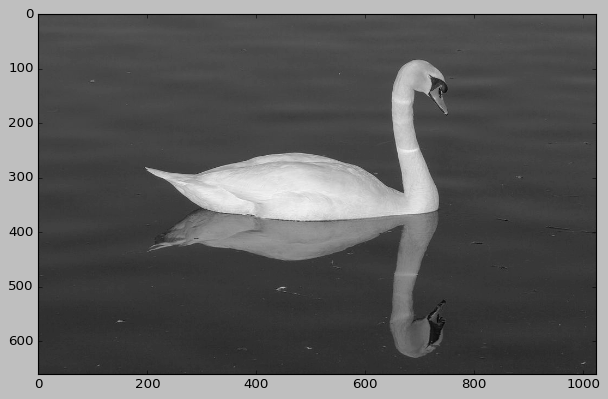

<PIL.Image.Image image mode=LA size=1024x660 at 0x7F3253EC48D0>


In [31]:
from six.moves import urllib
from PIL import Image
import matplotlib.pyplot as plt
import numpy as np

plt.style.use('classic')
img = Image.open(urllib.request.urlopen('https://biblioteca.acropolis.org/wp-content/uploads/2015/03/Cisne.jpg')).convert('LA')
#img = Image.open('lucy.jpg')
imggray = img.convert('LA')
imgmat = np.array(list(imggray.getdata(band=0)),float)

print(imgmat)

imgmat.shape = (imggray.size[1],imggray.size[0])

plt.figure(figsize=(9,6))
plt.imshow(imgmat,cmap='gray')
plt.show()
print(img)

In [32]:
U,D,V = np.linalg.svd(imgmat)
imgmat.shape


(660, 1024)

In [33]:
U.shape

(660, 660)

In [34]:
V.shape

(1024, 1024)

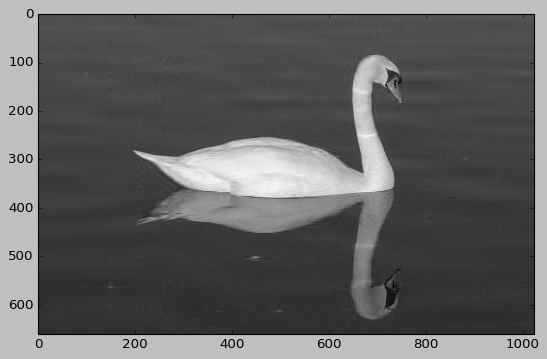

Felicidades la imagen está comprimida


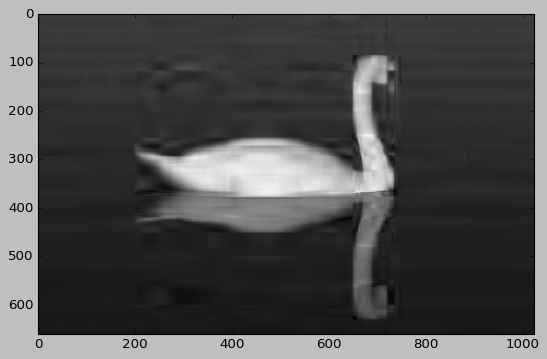

Felicidades la imagen está comprimida


In [41]:
#Cuantos valores crees que son necesarios?
#A=U*D*V
#aqui los elegiremos---------------------------
# por las dimensiones de este caso en particular 
#iremos de 0-660, siendo 660 como normalmente están los datos
#con 50 podemos observar que Lucy se ve casi igual, es decir conservamos aquello que en 
# realidad estaba aportando a la imagen en este caso :D por medio de la variabilidad 
#juega con el valor nvalue y ve que pasa con otros valores
nvalue = 50
#------------------------------
reconstimg = np.matrix(U[:,:nvalue])*np.diag(D[:nvalue])*np.matrix(V[:nvalue,:])
#ve las dimensiones de la imagen y su descomposicion
#660x1024= U(660X660)D(660X1024)V(1024x1024)
        #=U(660Xnvalues)D(nvaluesXnvalue)V(nvaluesx1024)

        #=U(660X50)(50X50)(50X1024)
plt.imshow(reconstimg,cmap='gray')
plt.show()
print("Felicidades la imagen está comprimida")

nvalue = 10
#------------------------------
reconstimg = np.matrix(U[:,:nvalue])*np.diag(D[:nvalue])*np.matrix(V[:nvalue,:])
#ve las dimensiones de la imagen y su descomposicion
#660x1024= U(660X660)D(660X1024)V(1024x1024)
        #=U(660Xnvalues)D(nvaluesXnvalue)V(nvaluesx1024)

        #=U(660X50)(50X50)(50X1024)
plt.imshow(reconstimg,cmap='gray')
plt.show()
print("Ejemplo de perdida de calidad con 10 nvalues")

¡Ahora es tu turno!, comprime 3 imagenes

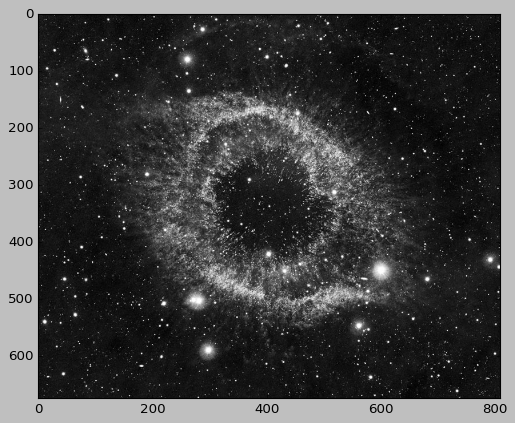

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=810x673 at 0x7F325149BD50>
Image size:  (673, 810)
U size:  (673, 673)
Z size:  (810, 810)
nValues = 10 


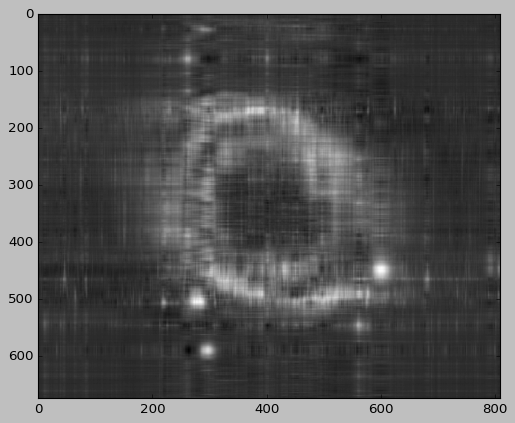

nValues = 70 


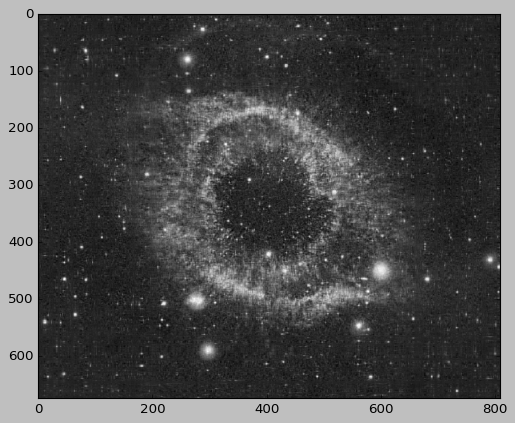

nValues = 150 


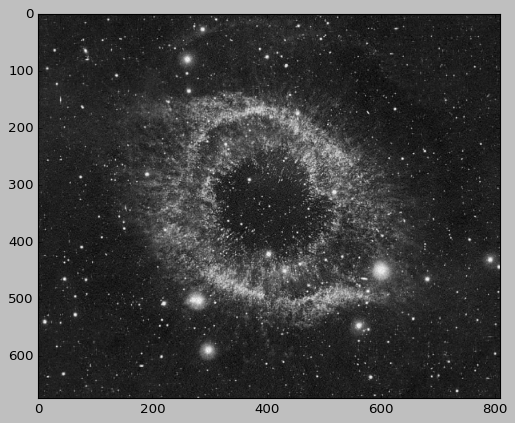

nValues = 300 


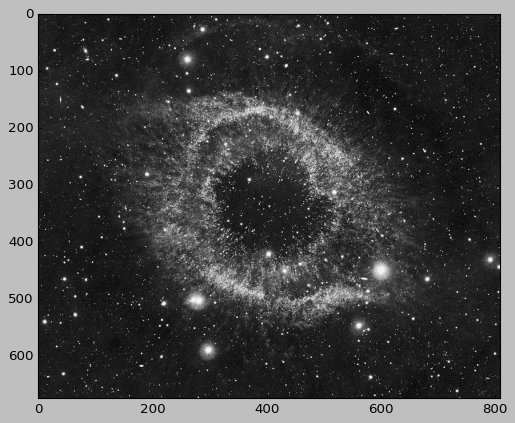

In [62]:
#imagen 1

plt.style.use('classic')
img = Image.open(urllib.request.urlopen('https://viewspace.org/assets/sliders/star_death/helix_nebula/eso_eso1205a_3000-nearIR-117d99ec416fec30e366b45dd718ec20cd6e4181220139fb0043ae36a0e84dea.jpg'))
imggray = img.convert('LA')
imgmat = np.array(list(imggray.getdata(band=0)),float)

#print(imgmat)
imgmat.shape = (imggray.size[1],imggray.size[0])

plt.figure(figsize=(9,6))
plt.imshow(imgmat,cmap='gray')
plt.show()
print(img)

U,D,V = np.linalg.svd(imgmat)
print('Image size: ',imgmat.shape)
print('U size: ',U.shape)
print('Z size: ',V.shape)

print('nValues = 10 ')
nvalue = 10
#------------------------------
reconstimg = np.matrix(U[:,:nvalue])*np.diag(D[:nvalue])*np.matrix(V[:nvalue,:])
plt.imshow(reconstimg,cmap='gray')
plt.show()

print('nValues = 70 ')
nvalue = 70
#------------------------------
reconstimg = np.matrix(U[:,:nvalue])*np.diag(D[:nvalue])*np.matrix(V[:nvalue,:])
plt.imshow(reconstimg,cmap='gray')
plt.show()

print('nValues = 150 ')
nvalue = 150
#------------------------------
reconstimg = np.matrix(U[:,:nvalue])*np.diag(D[:nvalue])*np.matrix(V[:nvalue,:])
plt.imshow(reconstimg,cmap='gray')
plt.show()

print('nValues = 300 ')
nvalue = 300
#------------------------------
reconstimg = np.matrix(U[:,:nvalue])*np.diag(D[:nvalue])*np.matrix(V[:nvalue,:])
plt.imshow(reconstimg,cmap='gray')
plt.show()

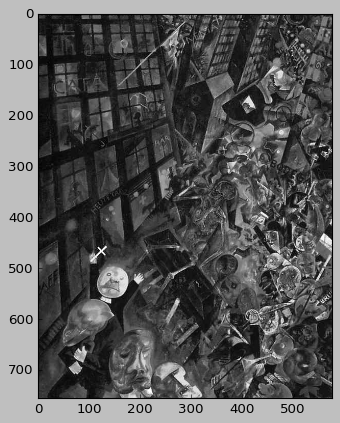

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=578x754 at 0x7F32517EFF50>
Image size:  (754, 578)
U size:  (754, 754)
Z size:  (578, 578)
nValues = 10 


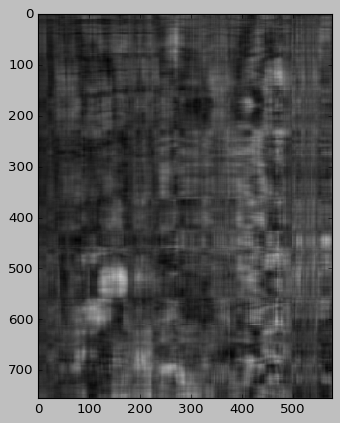

nValues = 50 


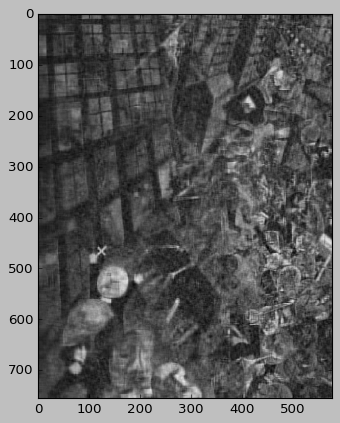

nValues = 100 


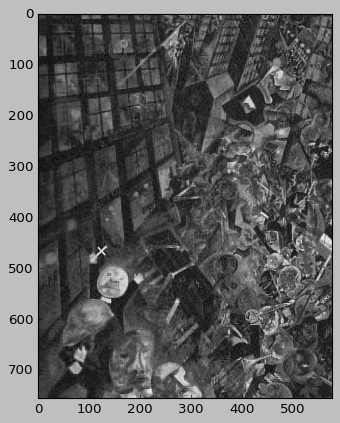

In [64]:
#imagen 2

plt.style.use('classic')
img = Image.open(urllib.request.urlopen('http://1.bp.blogspot.com/-Ku87665aOzQ/UEMrMkR_d8I/AAAAAAAAGdQ/5itkJim1_dQ/s1600/george-grosz-to-oskar-panizza.jpg'))
imggray = img.convert('LA')
imgmat = np.array(list(imggray.getdata(band=0)),float)

#print(imgmat)
imgmat.shape = (imggray.size[1],imggray.size[0])

plt.figure(figsize=(9,6))
plt.imshow(imgmat,cmap='gray')
plt.show()
print(img)

U,D,V = np.linalg.svd(imgmat)
print('Image size: ',imgmat.shape)
print('U size: ',U.shape)
print('Z size: ',V.shape)

print('nValues = 10 ')
nvalue = 10
#------------------------------
reconstimg = np.matrix(U[:,:nvalue])*np.diag(D[:nvalue])*np.matrix(V[:nvalue,:])
plt.imshow(reconstimg,cmap='gray')
plt.show()

print('nValues = 50 ')
nvalue = 50
#------------------------------
reconstimg = np.matrix(U[:,:nvalue])*np.diag(D[:nvalue])*np.matrix(V[:nvalue,:])
plt.imshow(reconstimg,cmap='gray')
plt.show()

print('nValues = 100 ')
nvalue = 100
#------------------------------
reconstimg = np.matrix(U[:,:nvalue])*np.diag(D[:nvalue])*np.matrix(V[:nvalue,:])
plt.imshow(reconstimg,cmap='gray')
plt.show()

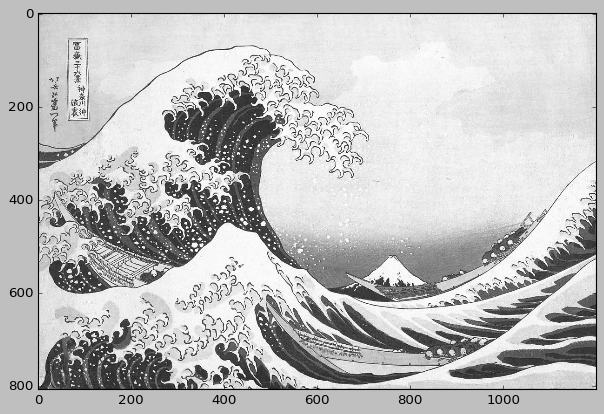

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=1200x807 at 0x7F32515331D0>
Image size:  (807, 1200)
U size:  (807, 807)
Z size:  (1200, 1200)
nValues = 10 


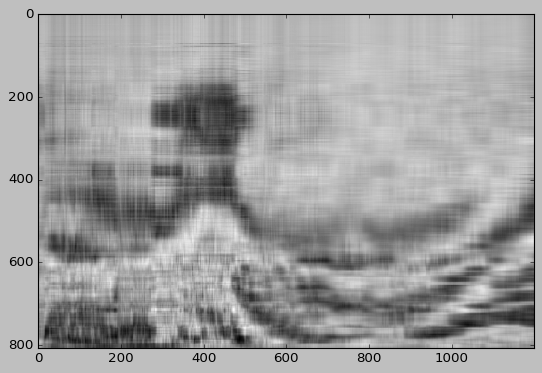

nValues = 60 


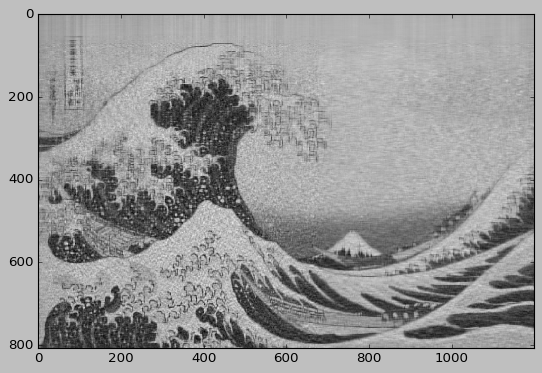

nValues = 120 


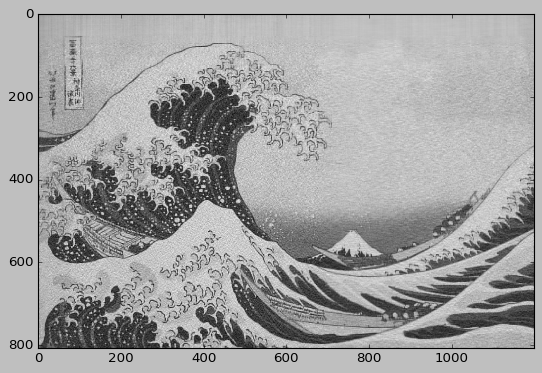

In [68]:
#imagen 3
plt.style.use('classic')
img = Image.open(urllib.request.urlopen('https://collectionapi.metmuseum.org/api/collection/v1/iiif/45434/134438/main-image'))
imggray = img.convert('LA')
imgmat = np.array(list(imggray.getdata(band=0)),float)

#print(imgmat)
imgmat.shape = (imggray.size[1],imggray.size[0])

plt.figure(figsize=(9,6))
plt.imshow(imgmat,cmap='gray')
plt.show()
print(img)

U,D,V = np.linalg.svd(imgmat)
print('Image size: ',imgmat.shape)
print('U size: ',U.shape)
print('Z size: ',V.shape)

print('nValues = 10 ')
nvalue = 10
#------------------------------
reconstimg = np.matrix(U[:,:nvalue])*np.diag(D[:nvalue])*np.matrix(V[:nvalue,:])
plt.imshow(reconstimg,cmap='gray')
plt.show()

print('nValues = 60 ')
nvalue = 60
#------------------------------
reconstimg = np.matrix(U[:,:nvalue])*np.diag(D[:nvalue])*np.matrix(V[:nvalue,:])
plt.imshow(reconstimg,cmap='gray')
plt.show()

print('nValues = 120 ')
nvalue = 120
#------------------------------
reconstimg = np.matrix(U[:,:nvalue])*np.diag(D[:nvalue])*np.matrix(V[:nvalue,:])
plt.imshow(reconstimg,cmap='gray')
plt.show()

# Ejercicio 3

**Feature importances**

Para este ejercicio, te pediremos que sigas el tutorial de la siguiente pagina:

https://towardsdatascience.com/pca-clearly-explained-how-when-why-to-use-it-and-feature-importance-a-guide-in-python-7c274582c37e




In [ ]:
#tu codigo aqui

Describe lo relevante del ejercicio y que descubriste de las variables análizadas. 